In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(42)

In [ ]:
X1 = np.random.normal(loc=[0,-10], size=(100,2))
X2 = np.random.normal(loc=[-10, 0], size=(100,2))
X3 = np.random.normal(loc=[0, 0], size=(100,2))
X4 = np.random.normal(loc=[-10, -10], size=(100,2))
X5 = np.random.normal(loc=[-5, -5], size=(100,2))
X = np.vstack((X1,X2,X3,X4,X5))
y = np.array([1]*100 + [2]*100 + [3]*100 + [4]*100 + [5]*100)

In [ ]:
k_means = KMeans(n_clusters=5)

In [ ]:
clusters = k_means.fit_predict(X)

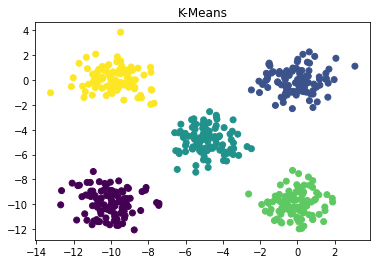

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title('K-Means')
plt.show()

In [ ]:
class KMeans(object):
    
    def __init__(self, k = 5, eps = 0.001, max_iter=300, seed=42):
        self.k = k
        self.eps = eps
        self.max_iter = max_iter
        self.seed = seed
    def euclidean_measure(self, obj, data): #евклидова мера
        return np.sum((obj - data) ** 2, axis = 1)
    def centre(self, data, k):  #центры
        return data[np.random.choice(len(data), size = k, replace = False)]
    def _clusters(self, data, centroids): #близлежащие кластеры
        clusters = []        
        for obj in data:
            distances = self.euclidean_measure(obj, centroids)
            #ищем ближайший центроид
            val, index = min((val, index) for (index, val) in enumerate(distances))
            #присваиваем кластеры
            clusters.append(index)
        return clusters
    def predict(self, data):
    clusters = self._clusters(data, self.centroids)
    return np.array(clusters)

    def fit_predict(self, data):
        self.fit(data)
        return self.predict(data)

In [ ]:
km = KMeans()
km.fit(X)
clusters = km.predict(X)

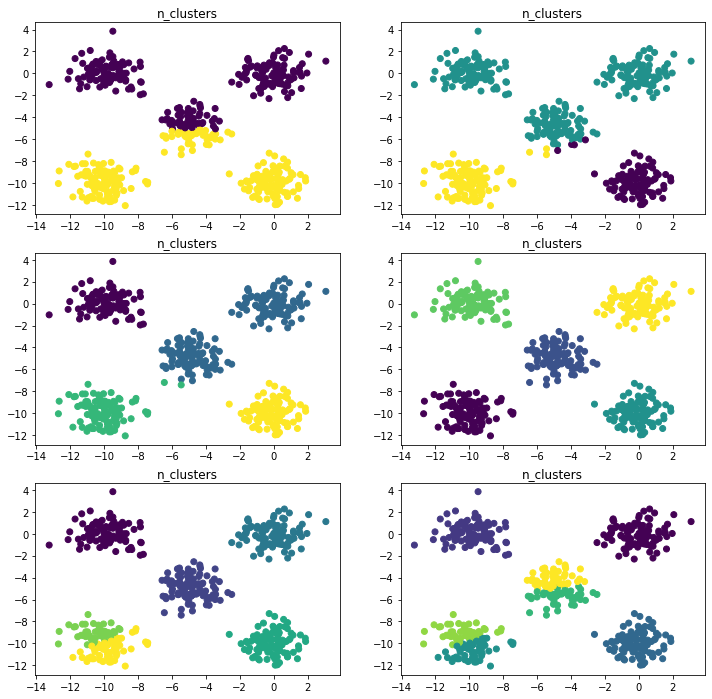

In [ ]:
plt.figure(figsize=(12, 12))
for n_c in range(2, 8):
    k_means = KMeans(n_clusters=n_c)
    clusters = k_means.fit_predict(X)
    plt.subplot(3, 2, n_c-1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.title('n_clusters')
plt.show()

In [ ]:
def drawSSEPlotManual(data, k=8, max_iter=300, eps=.001, seed=42):
    sse_values = []
    for i in range(1, k+1):
        km = KMeans(k=i, max_iter=max_iter, eps=eps, seed=seed)
        km.fit_predict(data)
        sse_values.append(km.SSE)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, k+1), sse_values, color='green')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE', fontsize=15)
    plt.title('SSE vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

In [ ]:
drawSSEPlotManual(X)